In [1]:
import os
import numpy as np
import pandas as pd

import random
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
from tensorflow.keras import layers,mixed_precision
from shutil import copyfile

import matplotlib.pyplot as plt
%matplotlib inline

2.4.1


In [2]:
import os 

#base_dir = 'D:\\College\\Semester8\\PraSemester\\MachineLearning_ImageClass\\ProjectSkripsi\\ImageClassificationWithoutOverfitting\\dataset'
base_dir = 'D:\\College\\Semester8\\PraSemester\\MachineLearning_ImageClass'
#train_dir = os.path.join(base_dir, 'cats_and_dogs')
train_dir = os.path.join(base_dir, 'PetImages')
#validation_dir = os.path.join(base_dir, 'test_set')


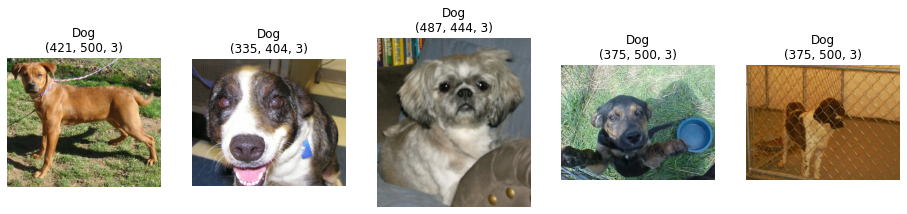

In [3]:
def plot_random_image(target_dir):
    """
    takes the directory as input and prints 5 random images from the randomly choosen class.
    """
    target_class=random.choice(os.listdir(target_dir))
    target_folder=os.path.join(target_dir,target_class)
    random_image=random.sample(os.listdir(target_folder),5)
 
    plt.figure(figsize=(16,5))
    for i in range(5):
        
        plt.subplot(1,5,i+1)
        img=tf.io.read_file(os.path.join(target_folder,random_image[i]))
        img=tf.io.decode_image(img)
        plt.imshow(img)
        plt.title(f'{target_class}\n{img.shape}')
        plt.axis(False) 

plot_random_image(train_dir)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255,
                                    rotation_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest',
                                    validation_split=0.2
)

validation_datagen = ImageDataGenerator( rescale = 1.0/225, 
                                       validation_split=0.2
)

#terapin batch size (mempercepat training)
train_generator = train_datagen.flow_from_directory( train_dir,
                                                        target_size = (176, 176),
                                                        class_mode = 'binary',
                                                        shuffle=True,
                                                        subset='training')

validation_generator = validation_datagen.flow_from_directory( train_dir,
                                                                target_size = (176, 176),
                                                                class_mode = 'binary',
                                                                shuffle=True, 
                                                                subset='validation')

Found 11239 images belonging to 2 classes.
Found 2808 images belonging to 2 classes.


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(176, 176, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'), #coba diturunin
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 174, 174, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 87, 87, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 42, 42, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 128)       0

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    verbose=1
)

Epoch 1/10
352/352 [==============================] - 279s 792ms/step - loss: 0.7180 - accuracy: 0.5245 - val_loss: 0.6537 - val_accuracy: 0.5677
Epoch 2/10
352/352 [==============================] - 271s 769ms/step - loss: 0.6766 - accuracy: 0.5601 - val_loss: 0.6371 - val_accuracy: 0.6243
Epoch 3/10
352/352 [==============================] - 272s 773ms/step - loss: 0.6448 - accuracy: 0.6303 - val_loss: 0.5891 - val_accuracy: 0.6834
Epoch 4/10
352/352 [==============================] - 270s 768ms/step - loss: 0.6082 - accuracy: 0.6695 - val_loss: 0.5521 - val_accuracy: 0.7076
Epoch 5/10
352/352 [==============================] - 274s 777ms/step - loss: 0.5699 - accuracy: 0.7073 - val_loss: 0.5159 - val_accuracy: 0.7343
Epoch 6/10
352/352 [==============================] - 273s 774ms/step - loss: 0.5313 - accuracy: 0.7263 - val_loss: 0.4963 - val_accuracy: 0.7660
Epoch 7/10
352/352 [==============================] - 272s 771ms/step - loss: 0.5025 - accuracy: 0.7548 - val_loss: 0.4823 -

Input Image is DOG


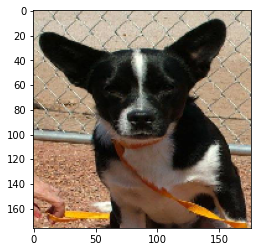

In [8]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#test_image = image.load_img('cat.4062.jpg',target_size=(150,100))
#test_image = image.load_img('neko.jpg',target_size=(150,150))
test_image = image.load_img('dog.4031.jpg',target_size=(176, 176))
#test_image = image.load_img('dog.4001.jpg',target_size=(150,150))

imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
if result <= 0.5 :
    print("Input Image is CAT")
else:
    print("Input Image is DOG")


Input Image is DOG


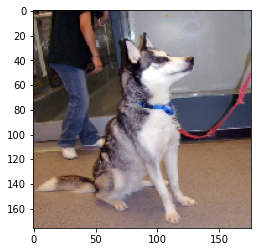

In [18]:
test_image_two = image.load_img('dog.4001.jpg',target_size=(176, 176))
#test_image_two = image.load_img('neko.jpg',target_size=(176, 176))
#test_image_two = image.load_img('contohTes.jpg',target_size=(176, 176))
#test_image_two = image.load_img('dog.4031.jpg',target_size=(176, 176))
#test_image_two = image.load_img('cat.4062.jpg',target_size=(176, 176))

imgplot_two = plt.imshow(test_image_two)
test_image_two = image.img_to_array(test_image_two)
test_image_two = test_image_two/255
test_image_two= np.expand_dims(test_image_two,axis=0)
result_two = model.predict(test_image_two)
if result_two <= 0.5 :
    print("Input Image is CAT")
else:
    print("Input Image is DOG")

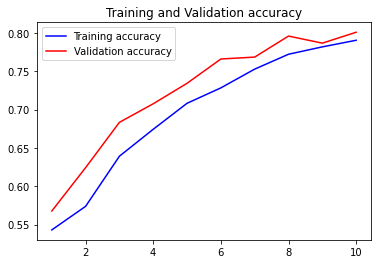

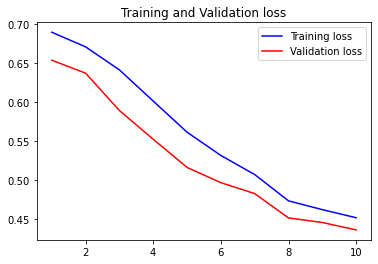

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(1, len(accuracy) + 1)

#Train and Validation accuracy
plt.plot(epoch, accuracy, 'b', label='Training accuracy')
plt.plot(epoch, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
#Train and Validation loss
plt.plot(epoch, loss, 'b', label='Training loss')
plt.plot(epoch,val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()